In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('data/chess-openings.csv')
counts = {k:v for k,v in dict(df['opening'].value_counts()).items() if v > 1}
openings = list(counts.keys())
mean_count = np.array(list(counts.values())).mean()

In [22]:
wins = dict()

for opening in openings:
    games = df[df['opening'] == opening]
    count = counts[opening]
    
    white = len(games[games['white_result'] == 'win']) / count
    black = len(games[games['black_result'] == 'win']) / count
    
    if count > mean_count:
        wins[opening] = white if white > black else -black

wins = dict(sorted(wins.items(), key=lambda item: item[1]), rev)

<BarContainer object of 420 artists>

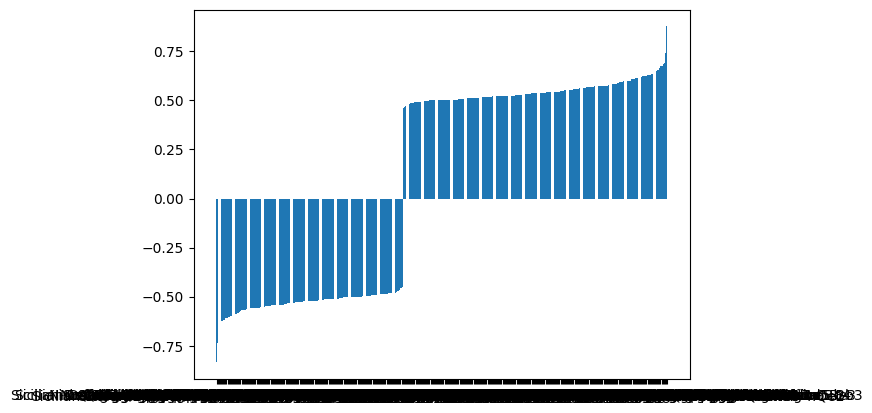

In [23]:
plt.bar([k for k,v in wins.items()], [v for k,v in wins.items()])